# Predicting Diabetes

# Problem Statement
----

### Objective:
---
    You are tasked with developing a predictive model to predict the quantitative measure of disease progression one year after baseline by using the dataset from sklearn package. The goal is to build and evaluate a model that accurately predicts the progression by answering certain questions asked.

### Dataset:
---
	The dataset has 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

    Note : You can load the diabetes dataset from  “sklearn.datasets“ package using “load_diabetes()”.

### Questions:
----

    Q1: Write the code for below sub-questions
    -	Generate last 3 rows of dataset?
    -	Print First, second and last row in the Dataframe
    -	Print the 2 rows just before the last 3 rows in the Dataframe
    -	Summarize the data as an analyst
    Q2:  Subset the above DataFrame for age>35.
    Q3: Find relation between Age, Sex and Target Variable.
    Q4: Generate Box plot to detect outliers.
    Q5: Split the dataset into training and test sets.
    Q6: Train the Model using training dataset.
    Q7. Generate Predictions using Test dataset.
    Q8: Calculate MSE for the predictions.
    Q9: Can you evaluate your models?
    Q10: Which model would you suggest?
    Q11: What would be your model monitoring strategy, which key performance statistical metrics you will consider while looking at model performance?


### Installing Required Libraries
----

In [4]:
print(f"The notebook is running.")

The notebook is running.


In [5]:
%pip install --quiet lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install --quiet seaborn
%pip install --quiet statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --quiet sweetviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install --quiet interpret lime

Note: you may need to restart the kernel to use updated packages.


In [9]:
#%pip list | grep distutils

In [10]:
#%pip install --upgrade pip setuptools

### Loading Required Libraries
----

In [12]:
import os
import joblib
import time
import warnings

In [13]:
import numpy as np
import pandas as pd

In [14]:
%%time
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

CPU times: total: 734 ms
Wall time: 2.21 s


In [15]:
%%time 
# Outlier/VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Model, Metrics and Visualization Libraries
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
import lightgbm as lgb
import xgboost as xgb

# Interpret ML libraries
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel, PartialDependence
from interpret.data import ClassHistogram, Marginal
from interpret.glassbox import ExplainableBoostingRegressor, RegressionTree
from interpret.glassbox import LinearRegression as LinearRegressionGlassbox
from interpret.perf import RegressionPerf

warnings.filterwarnings("ignore")

CPU times: total: 906 ms
Wall time: 3 s


In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
# Code to set the dynamic plot_stlye
# Try to set the desired style, fall back to default if not available
def set_plot_style(preferred_style='seaborn-v0_8', fallback_style='default'):
    try:
        plt.style.use(preferred_style)
        print(f"Plot style set to '{preferred_style}'")
    except ValueError:
        plt.style.use(fallback_style)
        print(f"Preferred style '{preferred_style}' not found. Using fallback style '{fallback_style}'")

# Set the plot style
set_plot_style(preferred_style='seaborn-v0_8', fallback_style='seaborn')

Plot style set to 'seaborn-v0_8'


In [18]:
# Magic variables
%matplotlib inline

#### Specify constants and variables

In [20]:
# Specify constants and variables

# Cross-validation folds
CV_FOLDS = 5
# Esimators used in the modelling part
N_ESTIMATORS = 100
# Random_State to get the same outputs/sample everytime
RANDOM_STATE = 42

# Notebook execution start time (helpful to calculated the elapsed time)
nb_start_time = time.time()

### Loading the Dataset
-----

In [22]:
%%time

# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to a DataFrame for easy manipulation
df = pd.DataFrame(
    data=diabetes.data, 
    columns=diabetes.feature_names
)
df['target'] = diabetes.target

# Shape of the dataframe
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the first few rows of the dataset
df.head()

The dataset contains 442 rows and 11 columns.
CPU times: total: 0 ns
Wall time: 9.9 ms


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Exploratory Data Analysis
----

In [24]:
# Calculating the Duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"The count of duplicate rows in the dataset is {duplicate_rows}.")

The count of duplicate rows in the dataset is 0.


In [25]:
# Print the number of unqiue values per column
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique values.")

age has 58 unique values.
sex has 2 unique values.
bmi has 163 unique values.
bp has 100 unique values.
s1 has 141 unique values.
s2 has 302 unique values.
s3 has 63 unique values.
s4 has 66 unique values.
s5 has 184 unique values.
s6 has 56 unique values.
target has 214 unique values.


In [26]:
# Verifying any null values in the dataset
null_val = df.isnull().sum()
print(f"The dataset contains null values for below columns:\n {null_val}")

The dataset contains null values for below columns:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [27]:
# Inferential Stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [28]:
# Descriptive stats
df.describe(include="all")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [29]:
# Generate the sweetviz report on the whole dataset
eda_report = sv.analyze(df)
# Save the report to an HTML file
eda_report.show_html('sweetviz_report_diabetes_all_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report_diabetes_all_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Q1. Write the code for below sub-questions

#### A. Generate last 3 rows of dataset?

In [32]:
last_three_rows = df.tail(3)
last_three_rows

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


#### B. Print First, second, and last row in the DataFrame

In [34]:
# Print the first row
print("First row:")
print(df.head(1))

First row:
        age      sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.05068  0.061696  0.021872 -0.044223 -0.034821 -0.043401   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  


In [35]:
# Print the second row
print("Second row:")
print(df.iloc[1:2])  # Use iloc to access a single row slice

Second row:
        age       sex       bmi        bp        s1        s2        s3  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   

         s4        s5        s6  target  
1 -0.039493 -0.068332 -0.092204    75.0  


In [36]:
# Print the last row
print("Last row:")
print(df.tail(1))

Last row:
          age       sex      bmi        bp       s1        s2        s3  \
441 -0.045472 -0.044642 -0.07303 -0.081413  0.08374  0.027809  0.173816   

           s4        s5        s6  target  
441 -0.039493 -0.004222  0.003064    57.0  


In [37]:
# Print the first, second and last row
first_row = df.iloc[0]
second_row = df.iloc[1]
last_row = df.iloc[-1]

first_row, second_row, last_row

(age         0.038076
 sex         0.050680
 bmi         0.061696
 bp          0.021872
 s1         -0.044223
 s2         -0.034821
 s3         -0.043401
 s4         -0.002592
 s5          0.019907
 s6         -0.017646
 target    151.000000
 Name: 0, dtype: float64,
 age       -0.001882
 sex       -0.044642
 bmi       -0.051474
 bp        -0.026328
 s1        -0.008449
 s2        -0.019163
 s3         0.074412
 s4        -0.039493
 s5        -0.068332
 s6        -0.092204
 target    75.000000
 Name: 1, dtype: float64,
 age       -0.045472
 sex       -0.044642
 bmi       -0.073030
 bp        -0.081413
 s1         0.083740
 s2         0.027809
 s3         0.173816
 s4        -0.039493
 s5        -0.004222
 s6         0.003064
 target    57.000000
 Name: 441, dtype: float64)

In [38]:
# Create a new DataFrame with these rows
selected_rows_df = pd.DataFrame(
    [first_row, second_row, last_row],
    index=['First Row', 'Second Row', 'Last Row']
)

# Transpose the DataFrame
transposed_df = selected_rows_df.T

# Display the transposed DataFrame
transposed_df

,First Row,Second Row,Last Row
age,0.038076,-0.001882,-0.045472
sex,0.050680,-0.044642,-0.044642
bmi,0.061696,-0.051474,-0.073030
bp,0.021872,-0.026328,-0.081413
s1,-0.044223,-0.008449,0.083740
s2,-0.034821,-0.019163,0.027809
s3,-0.043401,0.074412,0.173816
s4,-0.002592,-0.039493,-0.039493
s5,0.019907,-0.068332,-0.004222
s6,-0.017646,-0.092204,0.003064


#### C. Print the 2 rows just before the last 3 rows in the DataFrame

In [40]:
# Print  the 2 rows just before the last 3 rows in the DataFrame
rows_before_last_three = df.iloc[-5:-3]
rows_before_last_three

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.05068,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.05068,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0


#### D. Summarize the Data as an Analyst

In [42]:
# Summarize the dataset
summary = df.describe(include="all")
summary

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Q2: Subset the DataFrame for age > 35

In [44]:
# Calculate summary statistics
age_summary_stats = df['age'].describe(percentiles=[.0, .25, .5, .75, .95, .99, 1.0])
# Print the statistical summaries
print(age_summary_stats)

count    4.420000e+02
mean    -2.511817e-19
std      4.761905e-02
min     -1.072256e-01
0%      -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
95%      7.076875e-02
99%      9.107464e-02
100%     1.107267e-01
max      1.107267e-01
Name: age, dtype: float64


sns.distplot(df.age.unique())

# bin_laels=
# -.2, -.5, .1, .15

df.age2 = np.where(
    (
        (df.age > -.5) & (df.age < -.2)
    ), "Min_Val", 
    np.where(
        (
            (df.age>0.1) & (df.age < .15)
        ), "Max_val", 
    "no_val")
) 


# Define the bins and labels
bins = [-np.inf, -0.5, -0.2, 0.1, 0.15, np.inf]
labels = ['no_moin_val', 'Min_Val', 'no_mid_val', 'Max_Val', 'no_max_val']

# Use pd.cut to create the new column
df['bmi2'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

df['bmi3'] = np.where(
    (df['bmi'] > -0.5) & (df['bmi'] < -0.2), "Min_Val",
    np.where(
        (df['bmi'] > 0.1) & (df['bmi'] < 0.15), "Max_Val", 
        "no_val"
    )
)

df.bmi3.unique()

df.bmi2.unique()

In [48]:
### The age feature in the dataset is normalized.
### We'll filter the dataset for patients older than 35 using an approximate cutoff.
### In practice, you'd unnormalize it using the mean and standard deviation, but here we'll use a general range.

In [49]:
## Assuming Roughly corresponding to age > 35
age_filtered_df = df[df['age'] > 0.05]
age_filtered_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
28,0.052606,-0.044642,-0.021295,-0.074527,-0.040096,-0.037639,-0.006584,-0.039493,-0.000612,-0.054925,131.0
29,0.067136,0.050680,-0.006206,0.063187,-0.042848,-0.095885,0.052322,-0.076395,0.059424,0.052770,283.0
...,...,...,...,...,...,...,...,...,...,...,...
402,0.110727,0.050680,-0.033151,-0.022885,-0.004321,0.020293,-0.061809,0.071210,0.015568,0.044485,168.0
408,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343,189.0
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907,261.0
414,0.081666,0.050680,0.006728,-0.004534,0.109883,0.117056,-0.032356,0.091875,0.054720,0.007207,131.0


In [50]:
# Calculate the mean and standard deviation of the original data
mean_age = df['age'].mean()
std_age = df['age'].std()

# Assuming the data was normalized using (x - mean) / std
# Here, we use the general range for unnormalization. For example, if normalized age > 0.05:
normalized_threshold = 0.05

# Unnormalize the threshold to the original scale
unnormalized_threshold = mean_age + normalized_threshold * std_age
print(f"Unnormalized_threshold: {unnormalized_threshold}")
# Filter the DataFrame
age_filtered_df = df[df['age'] > unnormalized_threshold]

# Display the filtered DataFrame
age_filtered_df

Unnormalized_threshold: 0.00238095238095238


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
...,...,...,...,...,...,...,...,...,...,...,...
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014960,-0.001078,66.0
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617,173.0
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059,49.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0


### Q3: Find Relation Between Age, Sex, and Target Variable.

In [52]:
df.sex.value_counts(dropna=False)

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

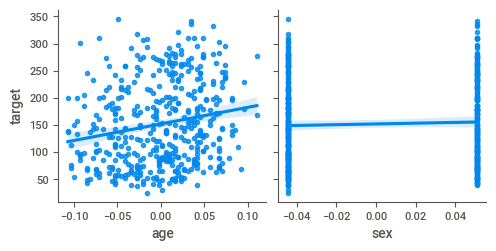

In [53]:
# Create a scatter plot matrix to visualize relationships
sns.pairplot(df, x_vars=['age', 'sex'], y_vars='target', kind='reg')
plt.show()

<Axes: xlabel='age', ylabel='target'>

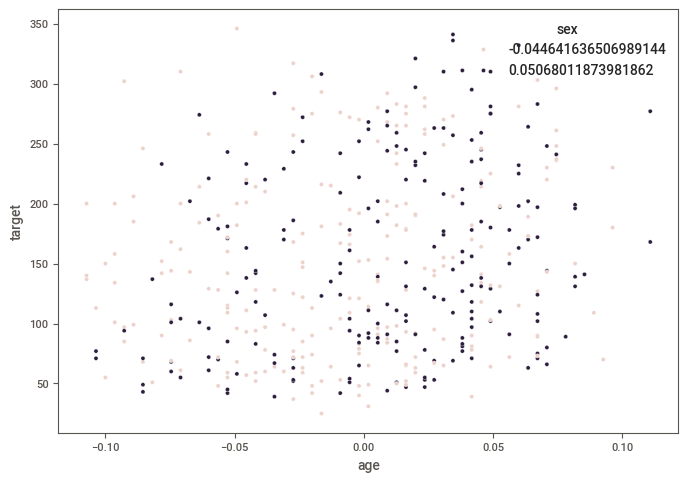

In [54]:
# Creating a three way scatter plot between them
sns.scatterplot (df, x="age", y="target", hue="sex")

### Q4: Generate Box Plot to Detect Outliers

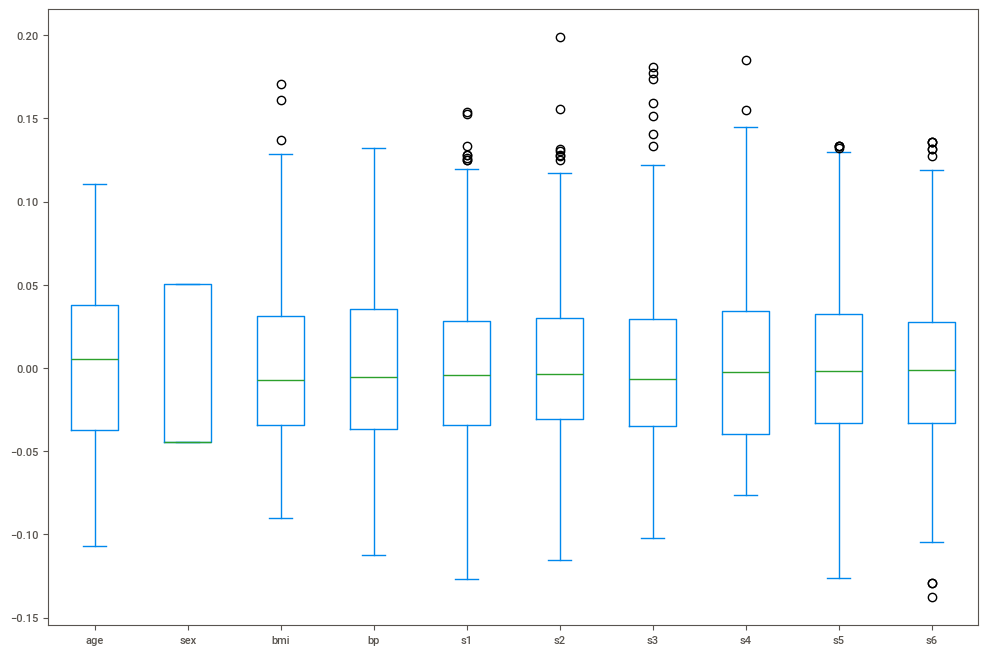

In [56]:
# Generate box plots for each feature to detect outliers
df.drop('target', axis=1).plot(kind='box', figsize=(12, 8))
plt.show()

In [57]:
# Detect Outliers
def detect_outliers_iqr(df, column):
    """
    Detect outliers in a dataframe column using the Interquartile Range (IQR) method.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - column (str): The name of the column in which to detect outliers.

    Returns:
    - pd.DataFrame: A dataframe containing the rows with outlier values in the specified column.

    The function calculates the first quartile (Q1) and third quartile (Q3) of the specified column,
    then computes the interquartile range (IQR) as Q3 - Q1. Outliers are defined as data points
    that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_dict_pre_capping = {}
for column in df.columns:
    outliers_dict_pre_capping[column] = detect_outliers_iqr(df, column)

# Print the number of outliers in each feature
for key, value in outliers_dict_pre_capping.items():
    print(f"{key} has {len(value)} outliers")

age has 0 outliers
sex has 0 outliers
bmi has 3 outliers
bp has 0 outliers
s1 has 8 outliers
s2 has 7 outliers
s3 has 7 outliers
s4 has 2 outliers
s5 has 4 outliers
s6 has 9 outliers
target has 0 outliers


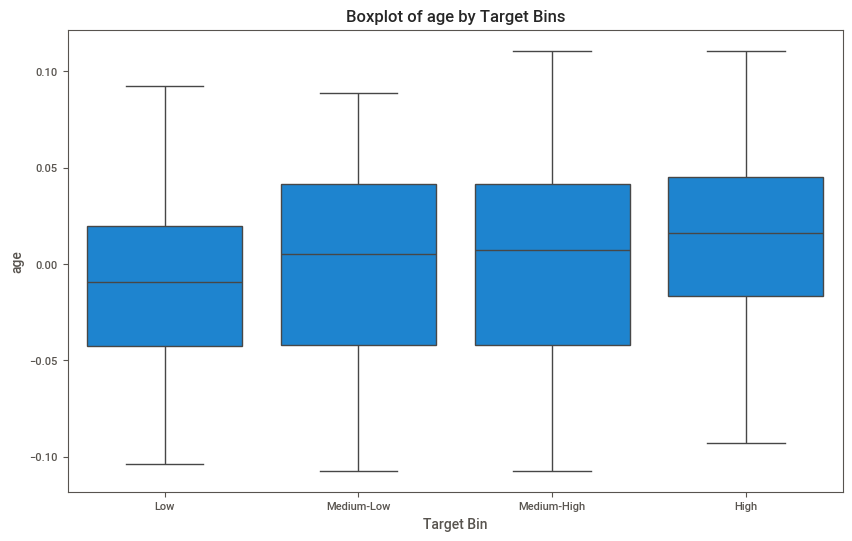

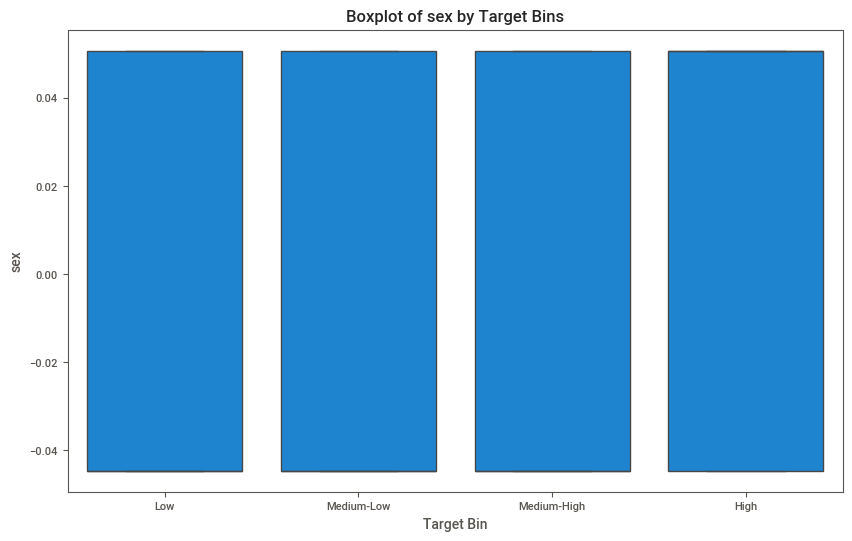

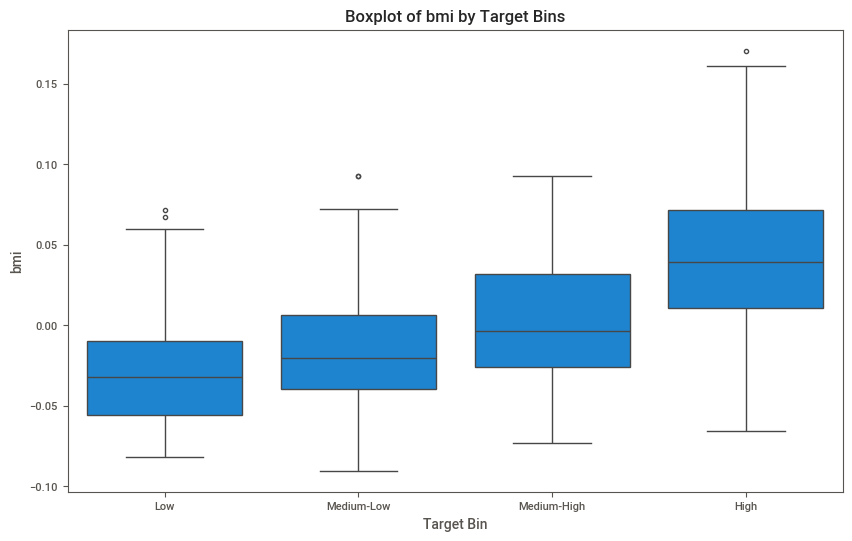

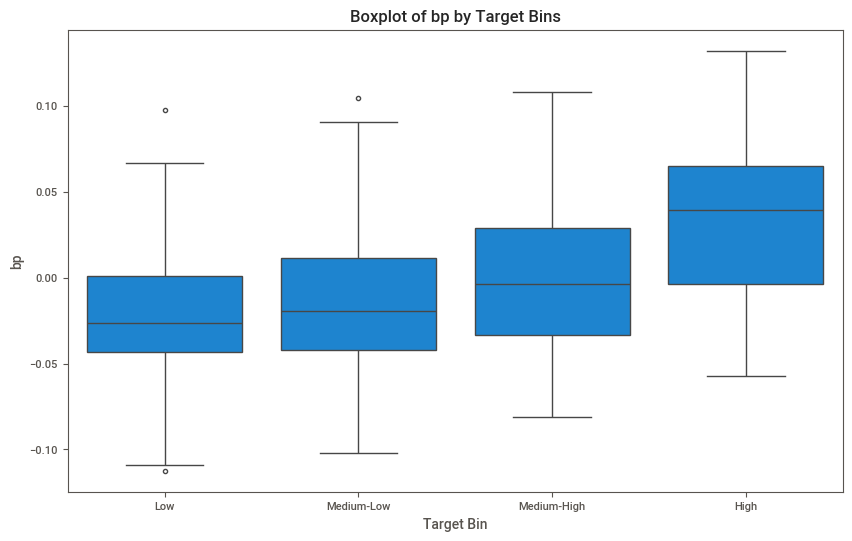

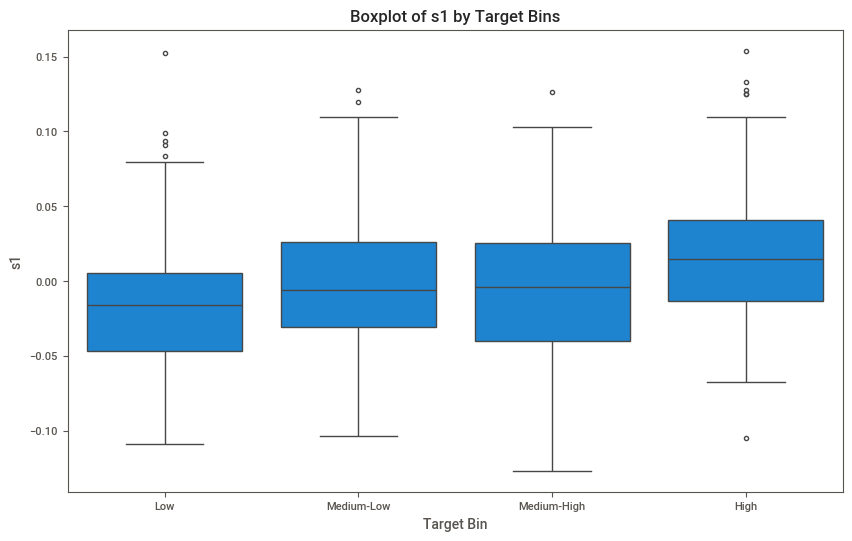

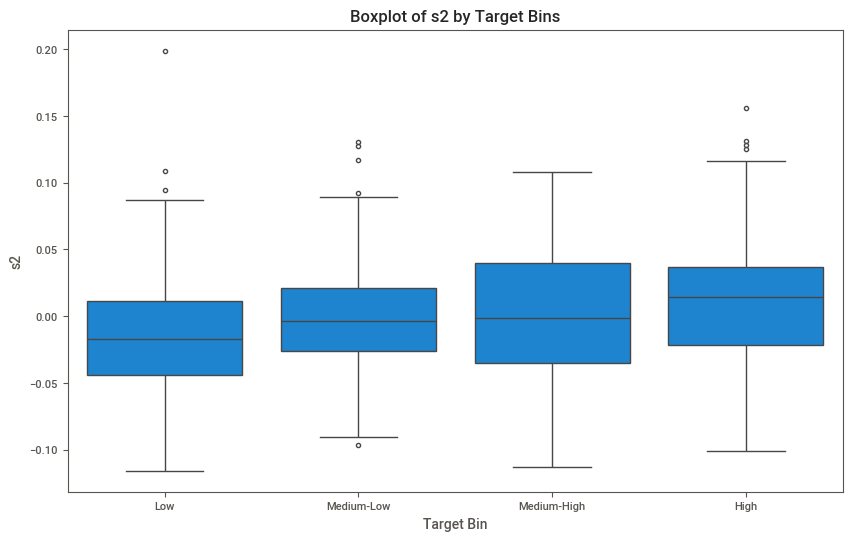

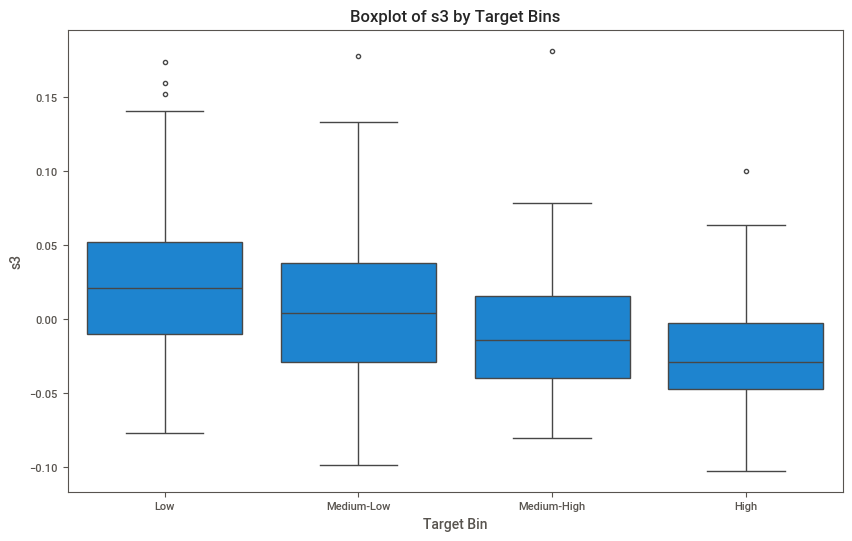

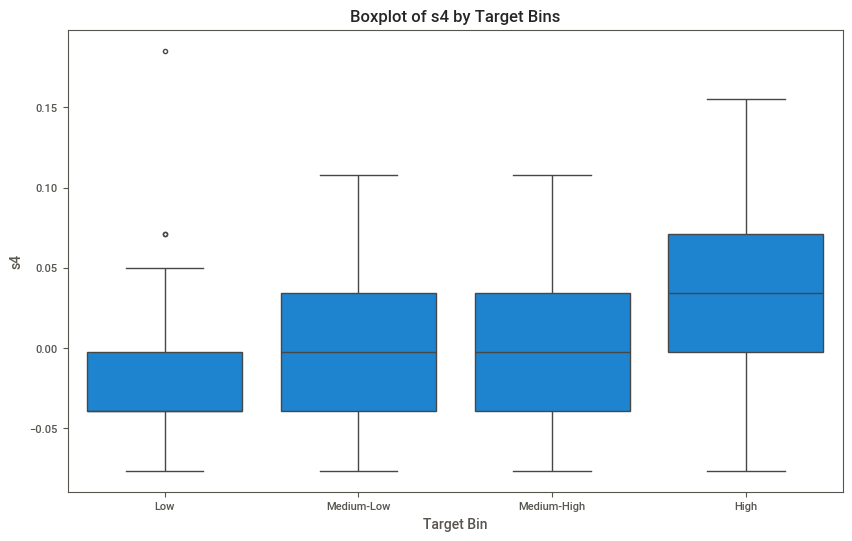

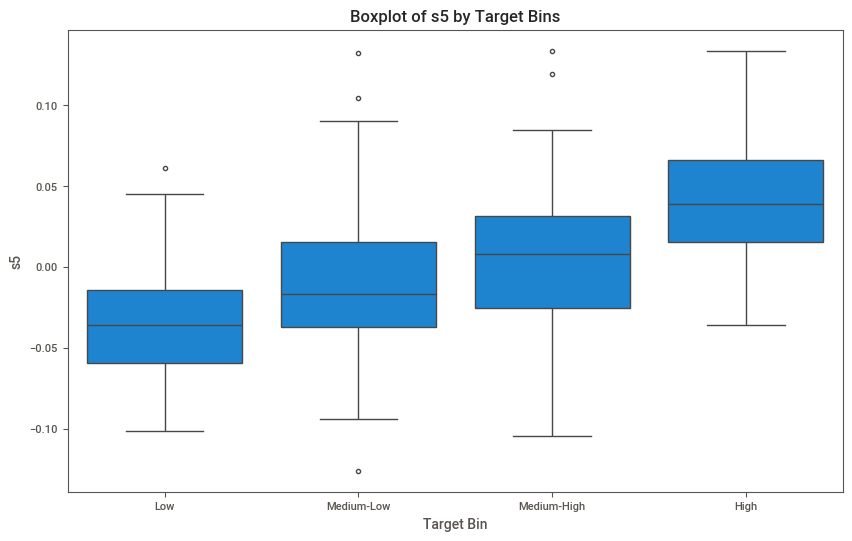

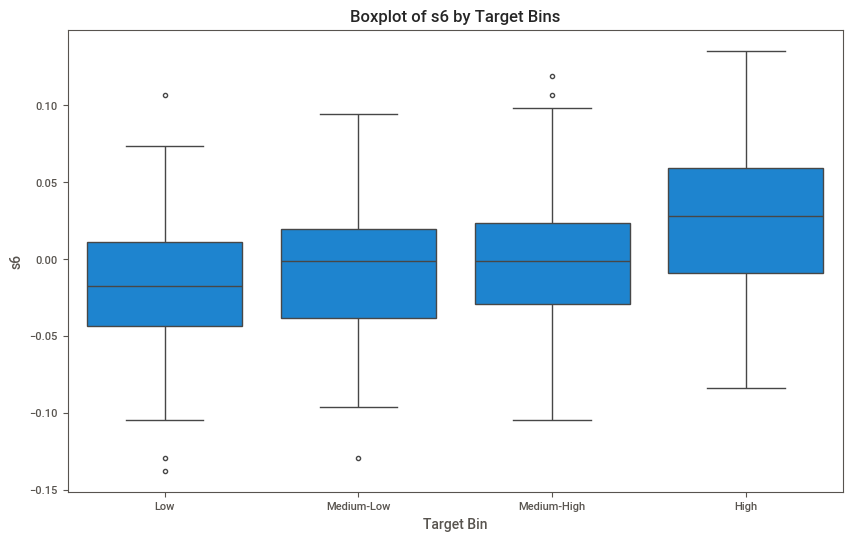

In [58]:
#Visualize Outliers before capping
# Bin the target variable
df['target_bin'] = pd.qcut(df['target'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Boxplots for each feature with respect to the binned target
for col in df.drop(['target', 'target_bin'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target_bin', y=col, data=df)
    plt.title(f'Boxplot of {col} by Target Bins')
    plt.xlabel('Target Bin')
    plt.ylabel(col)
    plt.show()

In [59]:
# Handle Outliers
def cap_outliers(df, column):
    """
    Cap the outliers in a dataframe column using the Interquartile Range (IQR) method.

    This function modifies the input dataframe by capping the outliers at the boundaries defined by
    the lower and upper limits of the IQR method.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - column (str): The name of the column in which to cap outliers.

    Returns:
    - pd.DataFrame: The dataframe with outliers in the specified column capped.

    The function calculates the first quartile (Q1) and third quartile (Q3) of the specified column,
    then computes the interquartile range (IQR) as Q3 - Q1. Outliers are capped at the values of
    Q1 - 1.5 * IQR and Q3 + 1.5 * IQR for the lower and upper bounds, respectively.
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_capped = df.copy()
for column in  df.drop(['target', 'target_bin'], axis=1).columns:
    df_capped = cap_outliers(df_capped, column)

# Display the transformed dataframe
df_capped.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-2.511817e-19,1.230790e-17,-0.000181,-4.797570e-17,-0.000212,-0.000353,-0.000533,-0.000114,-0.000021,-0.000130,152.133484
std,4.761905e-02,4.761905e-02,0.047056,4.761905e-02,0.047019,0.046527,0.045934,0.047227,0.047561,0.046997,77.093005
min,-1.072256e-01,-4.464164e-02,-0.090275,-1.123988e-01,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.124823,25.000000
25%,-3.729927e-02,-4.464164e-02,-0.034229,-3.665608e-02,-0.034248,-0.030358,-0.035117,-0.039493,-0.033246,-0.033179,87.000000
50%,5.383060e-03,-4.464164e-02,-0.007284,-5.670422e-03,-0.004321,-0.003819,-0.006584,-0.002592,-0.001947,-0.001078,140.500000
75%,3.807591e-02,5.068012e-02,0.031248,3.564379e-02,0.028358,0.029844,0.029312,0.034309,0.032432,0.027917,211.500000
max,1.107267e-01,5.068012e-02,0.129464,1.320436e-01,0.122267,0.120149,0.125954,0.145012,0.130949,0.119561,346.000000


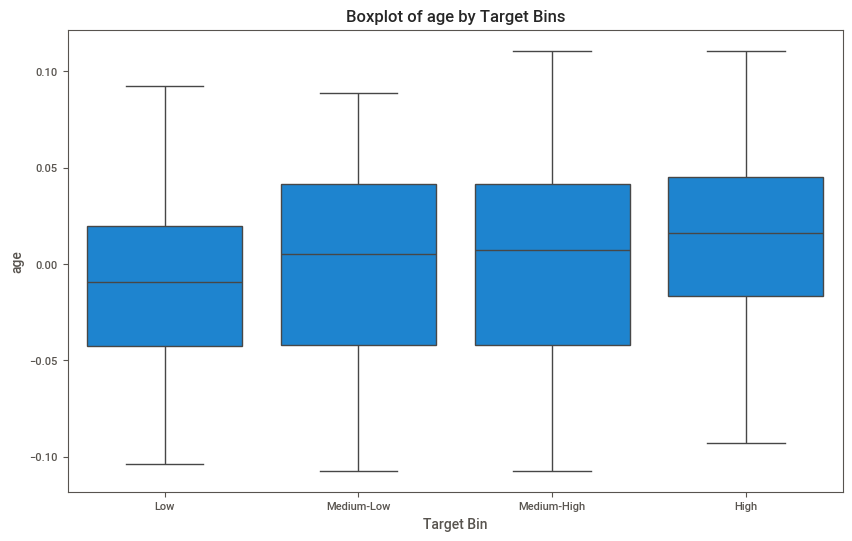

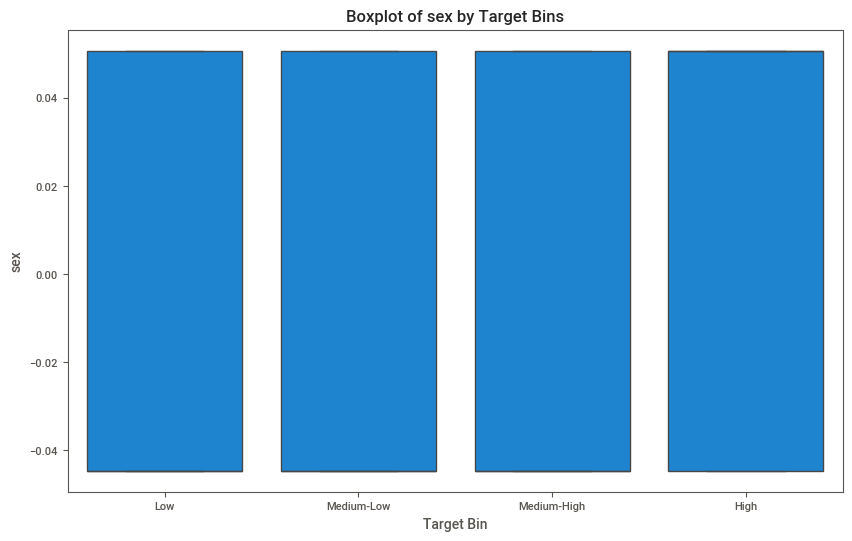

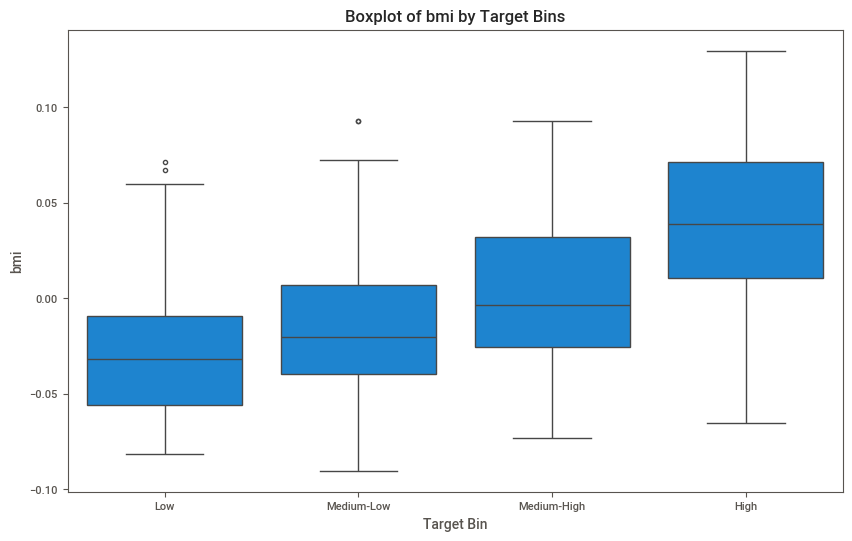

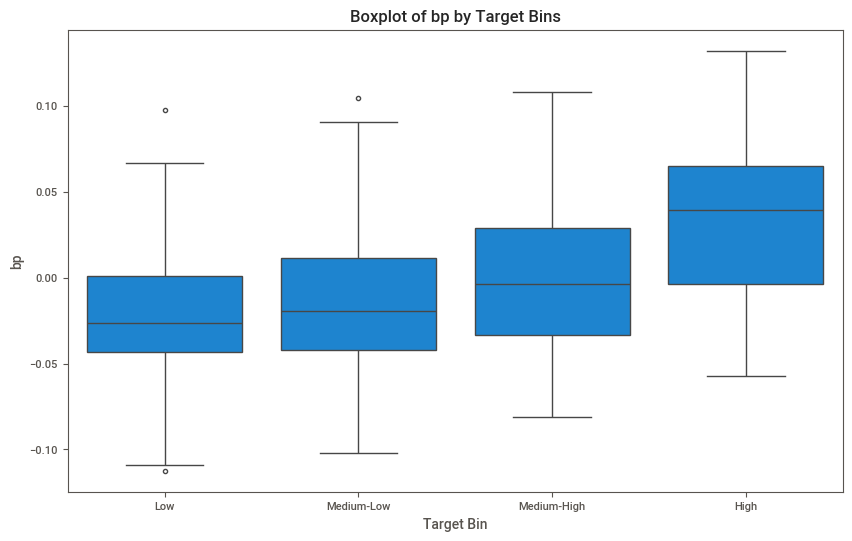

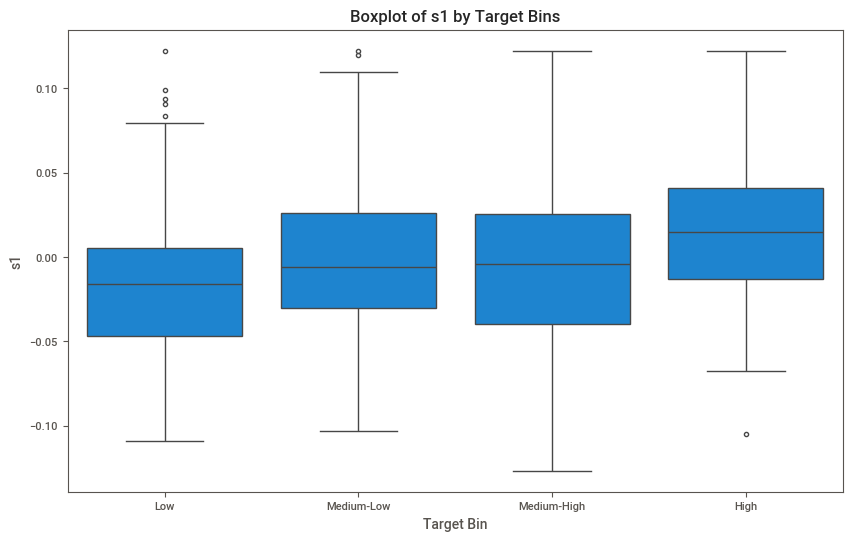

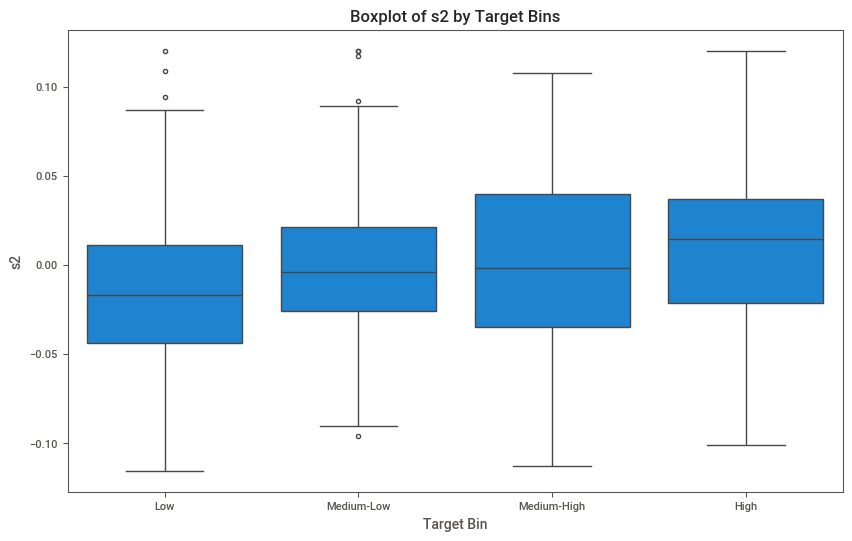

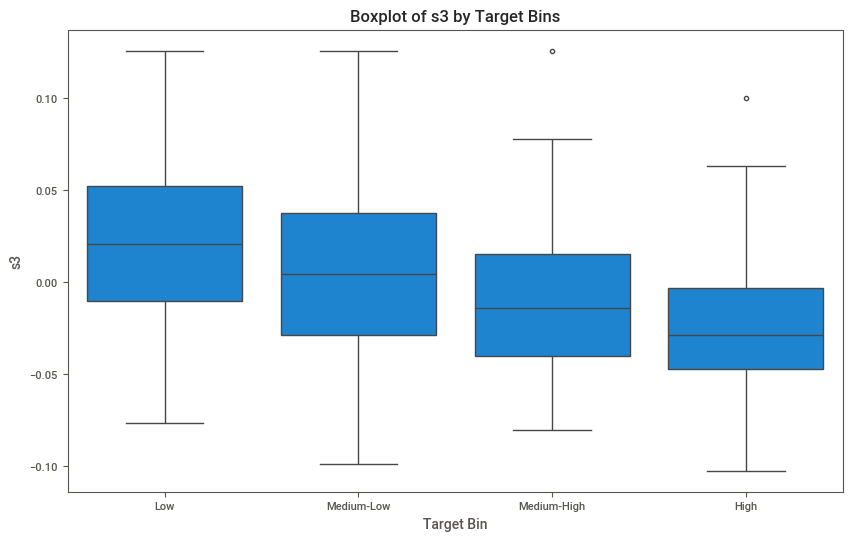

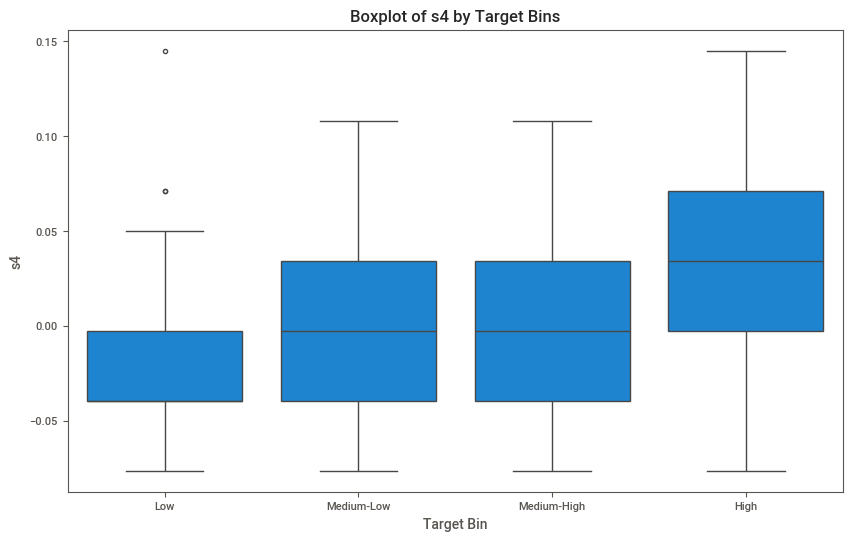

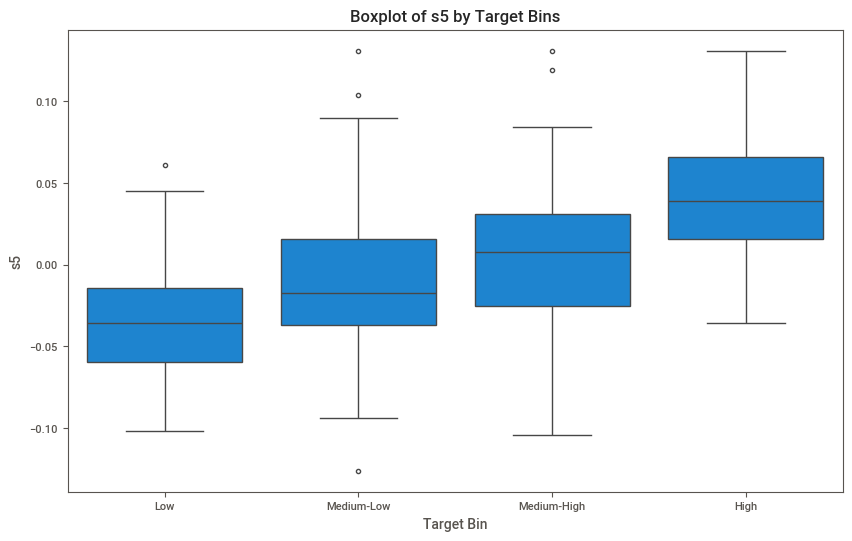

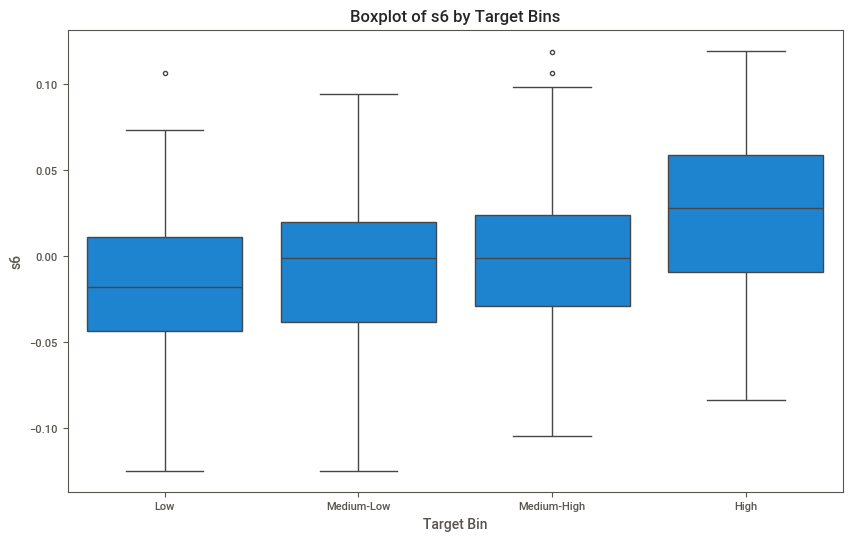

In [60]:
#Visualize Outliers before capping
# Boxplots for each feature with respect to the binned target
for col in df_capped.drop(['target', 'target_bin'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target_bin', y=col, data=df_capped)
    plt.title(f'Boxplot of {col} by Target Bins')
    plt.xlabel('Target Bin')
    plt.ylabel(col)
    plt.show()

In [110]:
df["flag"] = np.where(df.bmi>df.bmi.quantile(0.99), True, False)

In [112]:
df.flag.value_counts(dropna=False)

flag
False    437
True       5
Name: count, dtype: int64

In [ ]:
# Detect Outliers Post Cappings
outliers_dict_post_capping = {}
for column in df_capped.drop(['target', 'target_bin'], axis=1).columns:
    outliers_dict_post_capping[column] = detect_outliers_iqr(df_capped, column)

# Print the number of outliers in each feature
for key, value in outliers_dict_post_capping.items():
    print(f"{key} has {len(value)} outliers")

In [ ]:
# Histograms Before Capping
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
# Histograms After Capping
df_capped.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
# KDE plots
# Create KDE plots for all columns
def plot_kde_for_columns(df):
    """
    Plot Kernel Density Estimate (KDE) plots for each column in a DataFrame.

    This function creates KDE plots for all columns in the given DataFrame, with each plot displayed in a separate subplot.

    Parameters:
    - df (pd.DataFrame): The input dataframe containing the data to plot.

    Returns:
    - None: The function displays the KDE plots for each column in the DataFrame.

    The KDE plots provide a visual representation of the distribution of the data for each column. The 'fill=True' option fills
    the area under the KDE curve, making it easier to visualize the density.
    """
    num_columns = len(df.columns)
    plt.figure(figsize=(6, num_columns * 3))

    for i, column in enumerate(df.columns):
        plt.subplot(num_columns, 1, i + 1)
        sns.kdeplot(df[column], fill=True)
        plt.title(f'KDE Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Call the function to plot KDE plots
plot_kde_for_columns(df_capped.drop("target_bin", axis=1))

As the data seem to have less outliers, we can update the dataframe.

In [116]:
df = df_capped.drop("target_bin", axis=1).copy()
print(f"The shape of the dataframe is: {df.shape}")
df.head()

The shape of the dataframe is: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Multicollinearity Removal

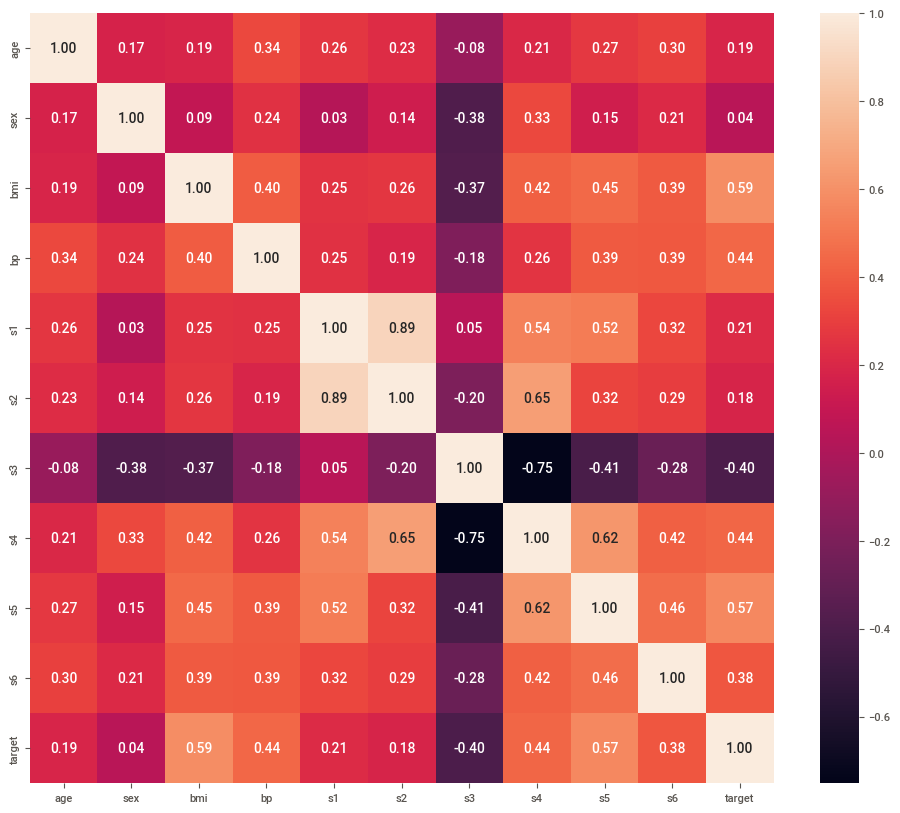

In [120]:
### Checking multicollinearity through Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
# Save the heatmap to a file
plt.savefig('heatmap.png')
plt.show()

In [118]:

def print_high_correlation_columns(df, threshold_low=-0.7, threshold_high=0.7):
    """
    Print columns with correlation values in the ranges [-1, -0.7] and [0.7, 1].

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        threshold_low (float): The lower bound for negative correlations (default is -0.7).
        threshold_high (float): The upper bound for positive correlations (default is 0.7).
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Find correlations that are in the specified ranges
    high_corr_pairs = []
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[1]):
            corr_value = corr_matrix.iloc[i, j]
            if corr_value <= threshold_low or corr_value >= threshold_high:
                high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_value))
    
    # Print the columns and their correlation values
    for col1, col2, corr_value in high_corr_pairs:
        print(f"Columns '{col1}' and '{col2}' have a correlation of {corr_value:.2f}")

print_high_correlation_columns(df)


Columns 's1' and 's2' have a correlation of 0.89
Columns 's3' and 's4' have a correlation of -0.75


In [ ]:
# # Add a constant to the model (intercept)
# X_with_const = add_constant(X)

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# # Display VIF values
# print(vif_data)

#### Based on above data, we can say that:

- s1 variable is heavily correlated with s2.
- s3 variable is correlated with s4.

**Dropping one variable from each of them.**

In [ ]:
# Dropping the correlated feature
cols_to_drop_for_multicollinearity_removal = [
    "s2", "s4"
]
df = df.drop(cols_to_drop_for_multicollinearity_removal, axis=1)

In [ ]:
# Save the updated dataframe to the parquet file
df.to_parquet('cleaned_diabietes_dataset.parquet')
print(f"The cleaned_diabietes_dataset file is saved successfully!")

## Modelling
----

In [ ]:
# Load the cleaned dataset to perform modelling
df = pd.read_parquet('cleaned_diabietes_dataset.parquet')
print(f"The shape of loaded cleaned diabietes dataset is {df.shape}")
df.head()

#### Train - Test Split

### Q5: Split the Dataset into Training and Test Sets

In [ ]:
# Defining Features and Target

# Get feature names from the DataFrame
feature_names = df.drop("target", axis=1).columns.tolist()
print("Feature names:", feature_names)
target_names = "target"
print("Target names:", target_names)

X = df.drop('target', axis=1)
y = df['target']

# Splitting the data to the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
# Combine the features and target for train and test sets
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Generate the Sweetviz report
compare_report = sv.compare([train_df, "Train"], [test_df, "Test"])

# Save the report to an HTML file
compare_report.show_html('sweetviz_report_pred_diabetes_train_test_comparison.html')

In [ ]:
marginal = Marginal(feature_names).explain_data(X_train, y_train, name='Train Data')
show(marginal)

### Q6: Train the Model Using Training Dataset

#### Applying Linear Regression:
- Working: A linear approach to modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation.
- Advantages: Simple to implement and interpret, computationally efficient.
- Disadvantages: Assumes a linear relationship, sensitive to outliers, can underperform when the relationship is non-linear.
- Parameters: No specific parameters in the basic model, but in practice, features may be standardized.

In [ ]:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

### Q7: Generate Predictions Using Test Dataset

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

### Q8: Calculate MSE for the Predictions

##### Mean Squared Error (MSE)

**Mean Squared Error (MSE)** is a commonly used metric for evaluating the performance of regression models. It measures the average of the squares of the errors, which are the differences between the predicted values and the actual values.

### Interpretation
- **MSE measures the average squared difference between the predicted and actual values.**
- **A lower MSE indicates better model performance**, as it means the predicted values are closer to the actual values.
- **MSE is sensitive to outliers** because it squares the errors, making larger errors have a disproportionately large impact.

### Applications
MSE is widely used in various contexts, including:
- Evaluating the performance of regression models.
- Comparing different models to select the best one.
- Fine-tuning hyperparameters to minimize prediction errors.

### Example
Suppose you have a model that predicts house prices and you want to evaluate its performance using MSE. You would compute the MSE by comparing the predicted house prices with the actual house prices from a test dataset. If the MSE is low, the model's predictions are close to the actual prices, indicating good performance.


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

### Q9: Evaluate Your Models

To evaluate the model, we consider metrics like Mean Squared Error (MSE), R-squared, and visual inspection of residuals.

In [ ]:
# Calculate R-squared
r_squared = model.score(X_test, y_test)

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

r_squared, mse

In [ ]:
# Calculate the Adjusted R-squared
def adjusted_r2(r2, n, p):
    """
    Calculate the adjusted R-squared value.

    Adjusted R-squared adjusts the R-squared value for the number of predictors in the model.
    It provides a more accurate measure of model performance when comparing models with different numbers of features.

    Parameters:
    r2 (float): The R-squared value of the model.
    n (int): The number of observations (data points) used in the model.
    p (int): The number of predictors (features) in the model.

    Returns:
    float: The adjusted R-squared value.
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Get the number of observations and features
n = len(y_test)
p = X_test.shape[1]

adj_r2 = adjusted_r2(r_squared, n, p)
print(f"Adjusted R-squared: {adj_r2}")

### Q11: Model Monitoring Strategy and Key Metrics

**A. Model Monitoring Strategy:**
- Regular Performance Evaluation: Continuously monitoring MSE and R-squared to ensure consistent performance.
- Drift Detection: Monitoring for changes in the distribution of input features or the target variable.
- Recalibration: Updating the model with new data periodically to maintain accuracy.
- Residual Analysis: Regularly analyzing residuals to detect any patterns indicating model issues

**B. Key Performance Metrics:**
- Mean Squared Error (MSE): To measure the average squared difference between the predicted and actual values.
- R-squared: To understand the proportion of variance explained by the model.

### Applying Smaller Decision tree for easy of visualization
- Working: Splits the data into subsets based on feature values to predict the target variable. The max_depth parameter limits the depth of the tree.
- Advantages: Easy to interpret, handles both numerical and categorical data, captures non-linear relationships.
- Disadvantages: Prone to overfitting, especially with high-depth trees; sensitive to small changes in the data.
- Parameters:
    - max_depth=3: Limits the depth of the tree to prevent overfitting

In [ ]:
# Initialize and train the Decision Tree Regressor with max_depth
df_reg_small = DecisionTreeRegressor(max_depth=3, random_state=42)
df_reg_small.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_dt = df_reg_small.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error with max_depth=3: {mse_dt}")

# Calculate R-squared
r_squared_dt = df_reg_small.score(X_test, y_test)
print(f"R-squared with max_depth=3: {r_squared_dt}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(df_reg_small, feature_names=diabetes.feature_names, filled=True)
plt.show()

### Applying DT

In [ ]:
# Train a Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=RANDOM_STATE)
dt_reg.fit(X_train, y_train)

# Generate predictions
y_pred_dt = dt_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

# Calculate R-squared
r_squared_dt = dt_reg.score(X_test, y_test)
print(f"R-squared: {r_squared_dt}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=diabetes.feature_names, filled=True)
plt.show()

Note:
- Large Trees Not Displaying:
    If the tree is too large, plot_tree might not render it correctly. We can try limiting the depth of the tree:

### Applying Ridge Regression
- Working: Linear regression with L2 regularization, which penalizes the magnitude of coefficients to prevent overfitting.
- Advantages: Reduces model complexity, less sensitive to multicollinearity.
- Disadvantages: May still be affected by multicollinearity, less interpretable coefficients.
- Parameters:
    - alpha=1.0: Regularization strength; higher values imply stronger regularization.

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

### Applying Lasso Regression
- Working: Linear regression with L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.
- Advantages: Can select important features, reducing model complexity.
- Disadvantages: May discard useful variables, sensitive to outliers.
- Parameters:
    - alpha=0.1: Regularization strength; higher values imply stronger regularization.

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

### Applying Random Forest Regressor
- Working: An ensemble method that fits multiple decision trees and averages their predictions to improve accuracy and control overfitting.
- Advantages: Handles non-linear relationships well, reduces overfitting, robust to outliers.
- Disadvantages: Can be computationally intensive, less interpretable than single decision trees.
- Parameters:
    - n_estimators=N_ESTIMATORS: Number of trees in the forest.
    - random_state=RANDOM_STATE: Ensures reproducibility.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

### Applying Gradient Boosting Regressor
- Working: Sequentially builds trees, with each tree correcting the errors of the previous ones. It's a form of boosting.
- Advantages: High predictive accuracy, handles complex data well.
- Disadvantages: Prone to overfitting, sensitive to hyperparameters, computationally expensive.
- Parameters:
    - n_estimators=N_ESTIMATORS: Number of boosting stages.
    - random_state=RANDOM_STATE: Ensures reproducibility.

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

### Applying Support Vector Machines
- Working: Uses a kernel trick to transform data and find a hyperplane that best fits the target values with minimal error.
- Advantages: Effective in high-dimensional spaces, robust to outliers (with appropriate loss function).
- Disadvantages: Not scalable to large datasets, sensitive to parameter tuning.
- Parameters:
    - kernel='rbf': Radial basis function kernel, which handles non-linear relationships.

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")

### Applying KNeighborsRegressor
- Working: Predicts target values based on the average of the k-nearest neighbors.
- Advantages: Simple to implement, no training phase, can capture complex relationships.
- Disadvantages: Computationally expensive for large datasets, sensitive to the choice of k and distance metric.
- Parameters:
    - n_neighbors=5: Number of neighbors considered for prediction.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regressor MSE: {mse_knn}")

### Applying MLPRegressor ((Multilayer Perceptron))
- Working: A feedforward neural network with multiple layers and non-linear activation functions.
- Advantages: Capable of learning complex relationships, flexible architecture.
- Disadvantages: Requires significant tuning, prone to overfitting, computationally intensive.
- Parameters:
    - hidden_layer_sizes=(100,): Specifies the number of neurons in the hidden layers.
    - max_iter=1000: Maximum number of iterations during training.
    - random_state=RANDOM_STATE: Ensures reproducibility.

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Regressor MSE: {mse_mlp}")

### Evaluate Multiple Models and Store the Results for Comparison

- **LightGBM Regressor**
    - Working: A gradient boosting framework that uses tree-based learning algorithms, optimized for speed and efficiency.
    - Advantages: Fast training speed, low memory usage, can handle large datasets.
    - Disadvantages: Sensitive to overfitting, requires careful tuning of hyperparameters.
    - Parameters:
        - objective='regression': Specifies the type of model.
        - metric='mse': Evaluation metric.
        - random_state=RANDOM_STATE: Ensures reproducibility.

- **XGBoost Regressor**
    - Working: An optimized gradient boosting framework that provides parallel tree boosting and is faster than other gradient boosting algorithms.
    - Advantages: High predictive accuracy, handles missing values, effective for large datasets.
    - Disadvantages: Can be prone to overfitting, sensitive to hyperparameters.
    - Parameters:
        - objective='reg:squarederror': Specifies the type of model for regression tasks.
        - random_state=42: Ensures reproducibility.

- **Explainable Boosting Machine (EBM) Regressor**
  - Working: An interpretable model that combines additive models with boosting to provide clear feature contributions and interactions.
  - Advantages:
    - Interpretable: Easy to understand feature impacts.
    - Flexible: Handles various data types and interactions.
    - Competitive Performance: High performance while maintaining transparency.
  - Disadvantages:
    - Computational Cost: May be slower than simpler models.
    - Feature Engineering: Requires careful feature selection.
  - Parameters:
    - feature_names: Names of the features.
    - interactions=0: No feature interactions (main effects only).
    - max_bins=256: Maximum bins per feature for representation.
    - random_state: Ensures reproducibility.

- **Pipeline with PCA and Random Forest**
  - Working: This pipeline first applies Principal Component Analysis (PCA) for dimensionality reduction and then fits a RandomForestRegressor to the transformed data. PCA reduces the feature space, which can improve the efficiency and effectiveness of the RandomForestRegressor.
 - Advantages:
    - Reduces feature space, improving efficiency.
    - RandomForest handles complex relationships well.
  - Disadvantages:
    - PCA can lose interpretability.
    - RandomForest requires careful tuning.
  - Parameters:
    - pca: Reduces dimensions.
    - rf: Performs regression.
    - random_state=RANDOM_STATE: Ensures reproducibility.

In [ ]:
# Initialize list to store results
results = []

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Small": DecisionTreeRegressor(
        max_depth=3,
        random_state=RANDOM_STATE
    ),
    "Decision Tree Regressor": DecisionTreeRegressor(
        random_state=RANDOM_STATE
    ),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor
     (n_estimators=N_ESTIMATORS,
      random_state=RANDOM_STATE
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=N_ESTIMATORS,
        random_state=RANDOM_STATE
    ),
    "SVR": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "LightGBM Regressor": lgb.LGBMRegressor(
        objective='regression',
        metric='mse',
        random_state=RANDOM_STATE,
        verbose=-1
    ),
    "XGBoost Regressor":xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=RANDOM_STATE
    ),
    "MLP Regressor": MLPRegressor(
        hidden_layer_sizes=(100,),
        max_iter=1000,
        random_state=RANDOM_STATE
  ),
    "EBM": ExplainableBoostingRegressor(
        feature_names=feature_names,
        interactions=0,
        max_bins=256,
        random_state=RANDOM_STATE
    ),
    "Pipeline with PCA and RF": Pipeline([
        ('pca', PCA()),
        ('rf', RandomForestRegressor(
            random_state=RANDOM_STATE
          ))
    ])
}

In [ ]:
def evaluate_multiple_models(
    models,
    X, y,
    X_train, y_train,
    X_test, y_test,
    cv_folds,
    col_to_rank="test_mse",
    suffix_file_name=""
):
    """
    Evaluate multiple machine learning models and save their performance metrics.

    This function performs cross-validation, trains models, evaluates them on test data,
    and calculates performance metrics including Mean Squared Error (MSE), R-squared,
    Adjusted R-squared, and the time taken for each model. It also saves each trained model
    as a .pkl file and creates a DataFrame with the results.

    Parameters:
    models (dict): A dictionary where keys are model names and values are model instances.
    X (DataFrame): The feature matrix used for cross-validation.
    y (Series): The target vector used for cross-validation.
    X_train (DataFrame): The training feature matrix.
    y_train (Series): The training target vector.
    X_test (DataFrame): The test feature matrix.
    y_test (Series): The test target vector.
    cv_folds (int, optional): The number of cross-validation folds. Default is CV_FOLDS.
    col_to_rank (str, optional): The column to rank. Default is "test_mse".
    suffix_file_name (str, optional): A suffix to be added to the filename. Default is "".

    Returns:
    DataFrame: A DataFrame containing the performance metrics and filenames of the saved models.
    """
    results = []

    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        start_time = time.time()  # Start timing

        # Perform cross-validation on the entire dataset
        cv_scores = cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
        mean_mse = -cv_scores.mean()  # Convert from negative MSE to positive MSE

        # Fit the model on the training data
        model.fit(X_train, y_train)
        # Generate predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate test set MSE
        test_mse = mean_squared_error(y_test, y_pred)
        # Calculate test set R-Squared
        r_squared = model.score(X_test, y_test)

        # Get the number of observations and features
        n = len(y_test)
        p = X_test.shape[1]
        adj_r2 = adjusted_r2(r_squared, n, p)

        end_time = time.time()  # End timing
        elapsed_time = end_time - start_time  # Calculate elapsed time

        # Save the model as a .pkl file
        pkl_filename = f"{model_name.replace(' ', '_') + suffix_file_name}.pkl"
        joblib.dump(model, pkl_filename)

        # Append results
        results.append({
            "model_name": model_name,
            "mean_mse": mean_mse,
            "test_mse": test_mse,
            "r_squared": r_squared,
            "adj_r_squared": adj_r2,
            "time_seconds": elapsed_time,
            "model_pkl_file": pkl_filename
        })

    # Create a DataFrame from results
    results_df = pd.DataFrame(results)

    # Add ranking column based on "col_to_rank" parameter
    ranked_col_name = f"rank_{col_to_rank}"
    results_df[ranked_col_name] = results_df[col_to_rank].rank(ascending=True).astype("int64")
    print(f"The ranking column based on {col_to_rank} has been added as {ranked_col_name}.")

    # Sort the DataFrame by rank
    results_df = results_df.sort_values(by=ranked_col_name)

    # Save the results dataframe
    save_results_file_name = f"pred_diabetes_eval_results{suffix_file_name}.csv"
    results_df.to_csv(save_results_file_name, index=False)
    print(f"The results dataframe has been saved as {save_results_file_name}.")

    # Display the DataFrame
    return results_df

In [ ]:
# Evaluating multiple models
results_df =  evaluate_multiple_models(
    models,
    X, y,
    X_train, y_train,
    X_test, y_test,
    cv_folds=CV_FOLDS,
    col_to_rank="test_mse",
    suffix_file_name = "" # Format: "_itr1"
)
results_df

In [ ]:
# Evaluating multiple models having CV only with Train set
results_df_only_train_in_cv =  evaluate_multiple_models(
    models,
    X=X_train, 
    y=y_train,
    X_train=X_train, 
    y_train=y_train,
    X_test=X_test, 
    y_test=y_test,
    cv_folds=CV_FOLDS,
    col_to_rank="test_mse",
    suffix_file_name = "_itr2"
)
results_df_only_train_in_cv

### Visualizing the Best Model: **Pipeline with PCA and RF**

In [ ]:
blackbox_model = joblib.load("Pipeline_with_PCA_and_RF.pkl")
blackbox_model

In [ ]:
def save_and_return_feature_importances(pipeline, model_name, feature_names):
    """
    Save the feature importances from the model to a CSV file and return the DataFrame.

    Parameters:
    - pipeline: The trained scikit-learn Pipeline object (with a model that has `feature_importances_`).
    - model_name: A string representing the model name to use in the CSV file.
    - feature_names: List of feature names used in the model.

    Returns:
    - feature_importances_df: A DataFrame containing the feature importances.
    """

    # Extract the model from the pipeline (assume the model is the last step)
    model = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Check if the model has feature importances
    if hasattr(model, 'feature_importances_'):
        # Extract feature importances
        importances = model.feature_importances_
    else:
        raise AttributeError(f"The model '{model_name}' does not have an attribute 'feature_importances_'.")

    # Create a DataFrame to store the feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort the DataFrame by importance in descending order
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Save the DataFrame to a CSV file
    csv_filename = f'{model_name}_feature_importances.csv'
    feature_importances_df.to_csv(csv_filename, index=False)
    print(f"{model_name.title()} Term importances saved to {csv_filename} successfully!")

    # Return the DataFrame
    return feature_importances_df

# Example usage
# Assume rf_model is a trained RandomForestRegressor and X_train is the training data
blackbox_feature_names = X_train.columns.tolist()
blackbox_feature_importances_df = save_and_return_feature_importances(
    blackbox_model,
    'PCA_w_RandomForest',
    blackbox_feature_names
)
blackbox_feature_importances_df

#### Show Blackbox Performance

In [ ]:
blackbox_perf = RegressionPerf(blackbox_model).explain_perf(X_test, y_test, name='Blackbox')
show(blackbox_perf)

#### Local Explanations:
  - How an individual prediction was made

In [ ]:
# Blackbox explainers need a predict function, and optionally a dataset
lime = LimeTabular(blackbox_model, X_train, random_state=1)

# #Pick the instances to explain, optionally pass in labels if you have them
# lime_local = lime.explain_local(X_test[:5], y_test[:5], name='LIME')
# show(lime_local, 0)

In [ ]:
background_val = pd.DataFrame(np.median(X_train, axis=0).reshape(1, -1), columns=X.columns)
shap = ShapKernel(blackbox_model, background_val)
shap_local = shap.explain_local(X_test[:5], y_test[:5], name='SHAP')

In [ ]:
show(shap_local)

#### Global Explanations:
  - How the model behaves overall

In [ ]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(blackbox_model, X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [ ]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(blackbox_model, X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global, 0)

## Enhancing Interpretability of the Models Using InterpretML

In [ ]:
# Reload the EBM pickle to generate visulaization plots
ebm_model = joblib.load("EBM.pkl")
ebm_model

#### Global Explanations:
  - What the model learned overall

In [ ]:
# Explain the model using the trained data
train_explanation = ebm_model.explain_global(name='Train Data')

# Show the explanation for the regression model
show(train_explanation)

#### Generating the Term Importances from the dataframe and saving it

In [ ]:
def save_and_return_term_importances(model, model_name):
    """
    Save the term importances from the EBM model to a CSV file and return the DataFrame.

    Parameters:
    - ebm_model: The fitted Explainable Boosting Machine model.
    - model_name: A string representing the model name to use in the CSV file.

    Returns:
    - term_importances_df: A DataFrame containing the term importances.
    """
    # Extract term importances and term names
    importances = model.term_importances()
    names = model.term_names_

    # Create a DataFrame to store the term importances
    term_importances_df = pd.DataFrame({
        'Feature': names,
        'Importance': importances
    })

    # Sort the DataFrame by importance in descending order
    term_importances_df = term_importances_df.sort_values(by='Importance', ascending=False)

    # Save the DataFrame to a CSV file
    csv_filename = f'{model_name}_term_importances.csv'
    term_importances_df.to_csv(csv_filename, index=False)
    print(f"{model_name.title()} Term importances saved to {csv_filename} successfully!")

    # Return the DataFrame
    return term_importances_df

In [ ]:
# Get the Term Importances for the Explainable Boosting Machine model
ebm_term_importances_df = save_and_return_term_importances(ebm_model, "ebm")
ebm_term_importances_df

#### Local Explanations:
  - How an individual prediction was made

In [ ]:
ebm_local = ebm_model.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local, 0)

#### Evaluate EBM performance

In [ ]:
ebm_perf = RegressionPerf(ebm_model, feature_names).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

In [ ]:
# Elapsed time
nb_end_time = time.time()
nb_elapsed_time = nb_end_time - nb_start_time
print(f"The time taken to run the notebook is: {round(nb_elapsed_time, 2)}")

### Future Scope:



*   Hyperparameter tuning can be applied.
*   Understanding of the features before normalization would be really helpful.